# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("rym_top5000.csv")

In [3]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [4]:
df2 = df.groupby(["Artist Name"]).agg({"Album": "sum", "Average Rating": "median"})
df2.sort_values(by=["Average Rating"], ascending=False).head(10)

,Album,Average Rating
Artist Name,,
Mingus,The Black Saint and the Sinner Lady,4.340
The Velvet Underground & Nico,The Velvet Underground & Nico,4.230
Wu-Tang Clan,Enter the Wu-Tang (36 Chambers),4.190
Slint,Spiderland,4.150
Godspeed You Black Emperor!,Lift Yr. Skinny Fists Like Antennas to Heaven!...,4.145
Television,Marquee Moon,4.130
The Jimi Hendrix Experience,Are You ExperiencedElectric LadylandAxis: Bold...,4.120
DJ Shadow,Endtroducing.....,4.110
Genius/GZA,Liquid Swords,4.110


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [5]:
ratings = df.groupby(["Artist Name"])["Average Rating"].agg(["min", "max"])
ratings["difference"] = ratings["max"] - ratings["min"]
ratings.sort_values(by = "difference", ascending = False).head(10)

,min,max,difference
Artist Name,,,
Kendrick Lamar,3.52,4.27,0.75
The Beatles,3.55,4.25,0.70
Pink Floyd,3.60,4.29,0.69
My Bloody Valentine,3.58,4.24,0.66
King Crimson,3.67,4.30,0.63
John Coltrane,3.70,4.30,0.60
Radiohead,3.66,4.23,0.57
Miles Davis,3.69,4.23,0.54
The Cure,3.63,4.17,0.54


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [6]:
df["Number of Ratings"] = df["Number of Ratings"].apply(np.vectorize(lambda x: x.replace(",", ""))).astype(np.number)

In [8]:
df_sel = df[["Artist Name", "Number of Ratings", "Number of Reviews"]]
many_rev = df_sel[(df["Number of Ratings"] >= 5000) & (df["Number of Reviews"] >= 15)].copy()
many_rev["fraction"] = many_rev["Number of Ratings"] / many_rev["Number of Reviews"]
many_rev.sort_values(by = "fraction", ascending=False).head(10)

,Artist Name,Number of Ratings,Number of Reviews,fraction
353,Death Grips,10855.0,30,361.833333
1695,Mitski,5856.0,19,308.210526
3733,春ねむり [Haru Nemuri],6277.0,23,272.913043
4949,Brockhampton,17629.0,70,251.842857
1036,Brockhampton,17118.0,68,251.735294
2489,福居良 [Ryo Fukui],5968.0,24,248.666667
643,Frank Ocean,8911.0,39,228.487179
2869,Denzel Curry,11271.0,50,225.420000
950,Brockhampton,18322.0,85,215.552941
439,Death Grips,20614.0,102,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [9]:
import re
re.search("\d{4}", "16 June 1997")[0]

'1997'

In [10]:
df3 = df.copy()
df3["Year"] = df3["Release Date"].apply(np.vectorize(lambda x: re.search("\d{4}", x)[0])).astype(np.int16)

In [11]:
df3_a = df3[["Album", "Year", "Number of Reviews"]]
df3_a = df3_a[df3_a["Number of Reviews"] >= (df3_a["Number of Reviews"].quantile(0.75))]
best_rev_years = df3_a.groupby("Year")["Album"].agg("count").sort_values(ascending = False).head(5)
best_rev_years

Year
1970    43
1971    41
1969    38
1994    36
1995    34
Name: Album, dtype: int64

In [12]:
df3_b = df3[["Album", "Year", "Number of Ratings"]]
df3_b = df3_b[df3_b["Number of Ratings"] >= (df3_b["Number of Ratings"].quantile(0.75))]
best_rat_years = df3_b.groupby("Year")["Album"].agg("count").sort_values(ascending = False).head(5)
best_rat_years

Year
1994    41
1971    36
1970    35
1996    34
1995    33
Name: Album, dtype: int64

## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
import plotly as plx
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

In [14]:
years_set = set(best_rat_years.index.tolist())
dfZ2 = df3[df3["Year"].isin(years_set)][["Year", "Average Rating"]]
dfZ2

,Year,Average Rating
17,1970,4.19
20,1994,4.20
36,1971,4.10
39,1996,4.17
41,1994,4.11
...,...,...
4959,1994,3.68
4962,1970,3.66
4973,1996,3.66
4990,1996,3.65


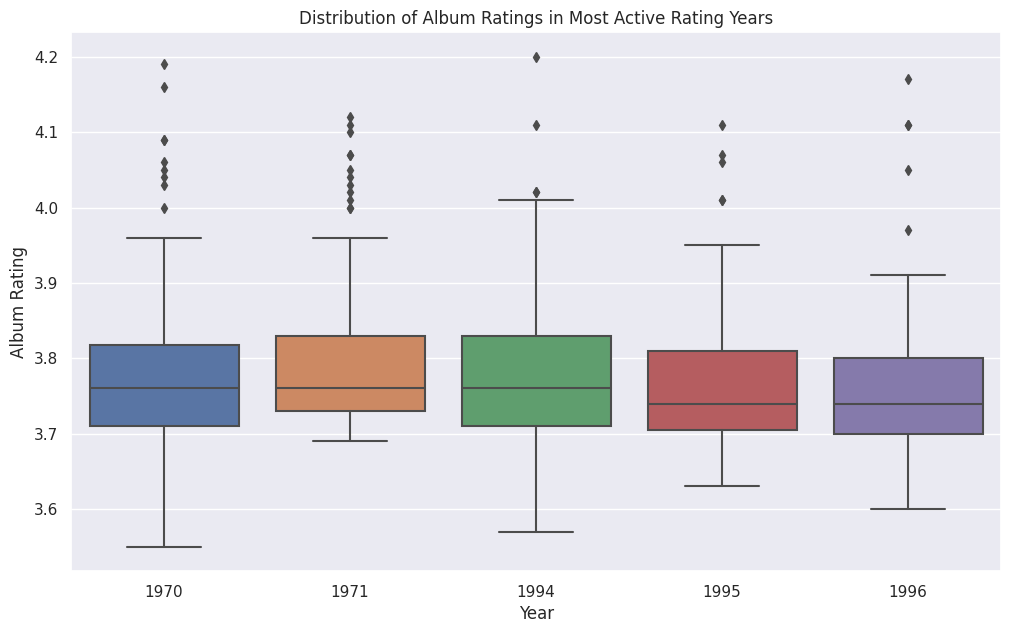

In [15]:
sns.boxplot(data=dfZ2, x = 'Year', y = 'Average Rating')
plt.ylabel("Album Rating")
plt.xlabel("Year")
plt.title("Distribution of Album Ratings in Most Active Rating Years")
plt.show()

In [16]:
dfZ2b = df3[["Genres", "Average Rating"]].copy()
dfZ2b.head()

,Genres,Average Rating
0,"Alternative Rock, Art Rock",4.23
1,"Progressive Rock, Art Rock",4.29
2,"Progressive Rock, Art Rock",4.30
3,"Art Rock, Experimental Rock, Electronic",4.21
4,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap",4.27


In [17]:
res_df = dfZ2b[dfZ2b["Genres"].apply(np.vectorize(lambda x: re.search("Rock", x) != None))]
res_df = res_df.assign(Base="Pop")
for base_genre in ("Pop", "Hip Hop","Rap", "Rock", "Electronic", "Jazz", "Classical")[1:]:
    matching_type = dfZ2b[dfZ2b["Genres"].apply(np.vectorize(lambda x: re.search(base_genre, x) != None))]
    matching_type = matching_type.assign(Base=base_genre)
    res_df = pd.concat([res_df, matching_type], ignore_index=True)
res_df = res_df[["Average Rating", "Base"]]
res_df = res_df.rename(columns = {"Base": "Base Genre"})
res_df

,Average Rating,Base Genre
0,4.23,Pop
1,4.29,Pop
2,4.30,Pop
3,4.21,Pop
4,4.20,Pop
...,...,...
4375,3.69,Classical
4376,3.70,Classical
4377,3.68,Classical
4378,3.68,Classical


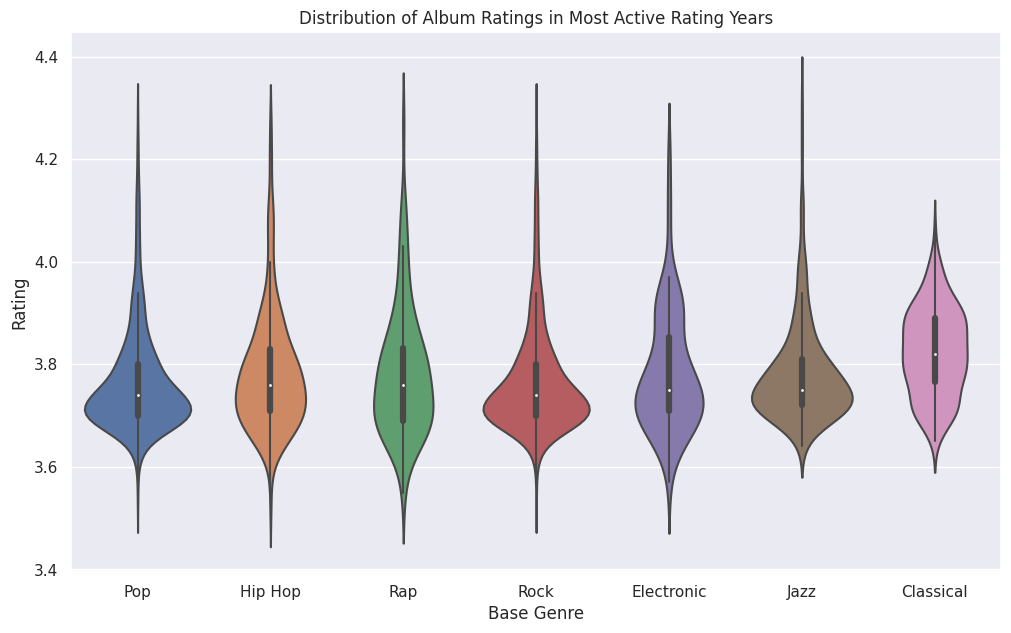

In [18]:
sns.violinplot(data = res_df, x = 'Base Genre', y = 'Average Rating')
plt.ylabel("Rating")
plt.title("Distribution of Album Ratings in Most Active Rating Years")
plt.show()

### Merge

(3.4, 4.4)

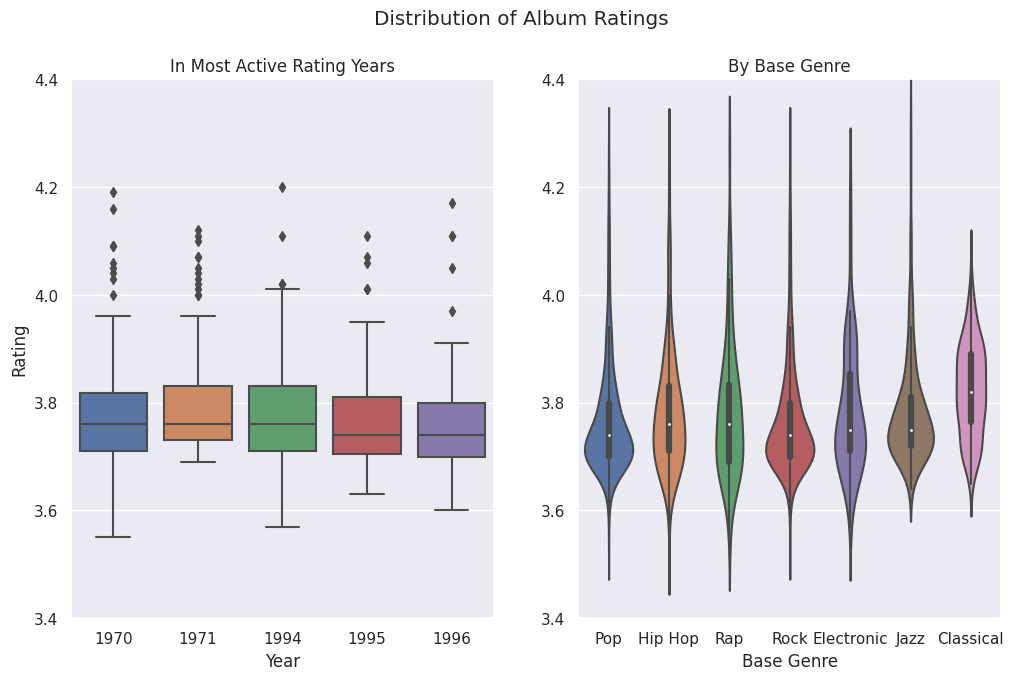

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Distribution of Album Ratings")
ax1.set_title("In Most Active Rating Years")
ax2.set_title("By Base Genre")

## First
sns.boxplot(ax=ax1, data=dfZ2, x = 'Year', y = 'Average Rating')
ax1.set_ylabel("Rating")
ax1.set_ylim((3.4, 4.4))

## Second
sns.violinplot(ax=ax2, data = res_df, x = 'Base Genre', y = 'Average Rating')
ax2.set_ylabel(None)
ax2.set_ylim((3.4, 4.4))

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 